
# QUESTION 2

## Study the implementation of PCA under the scikit-learn.

We are going to study the implementation of PCA with scikit-learn module using the popular breaset cancer dataset from
the scikit library 

We will follow the following implementations

[1] standardize/normalize the data before applying PCA.

[2] Select the required number of principal components.

[3] Fit and transform method

[4] Visualize the transformed dataset

[5] Interpret and conclude on the result


In [1]:
#Importations of neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()




In [3]:
#View the data to have better picuture of the data
df_data = pd.DataFrame(data.data, columns=data.feature_names)
df_data_disp=df_data
# Add target column to DataFrame
df_data_disp['target'] = data.target
df_data_disp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


##### Checking the dimsionality of the dataset

In [4]:
#Looking at the dimensionality of the dataset
print("The dataset under study has {} number of features/attributes and {} number of target space ".format(len(data['feature_names']),len(data['target_names'])-1))

The dataset under study has 30 number of features/attributes and 1 number of target space 


In [5]:
#From the above print out we have that;
print("The dimsion of our data set is 569x30")

The dimsion of our data set is 569x30


In [6]:
# Scalling the data before applying PCA
scaling=StandardScaler()
scaling.fit(df_data)
S_data=scaling.transform(df_data)
 
#Applying the PCA
# Set the n_components=2
principal=PCA(n_components=2)
principal.fit(S_data)
x=principal.transform(S_data)

In [7]:
# The dimensions of data after PCA
print("Out of the 30 feature, by applying PCA we have deduce 2 principal components of them")
print(x.shape)
print('...................................')
print()
print("The ratio the variance in the new PCA features are {} and {} for component 1 and 2 respectively".format(principal.explained_variance_ratio_[0],principal.explained_variance_ratio_[1]))

Out of the 30 feature, by applying PCA we have deduce 2 principal components of them
(569, 2)
...................................

The ratio the variance in the new PCA features are 0.4489603531322386 and 0.18472103780874785 for component 1 and 2 respectively


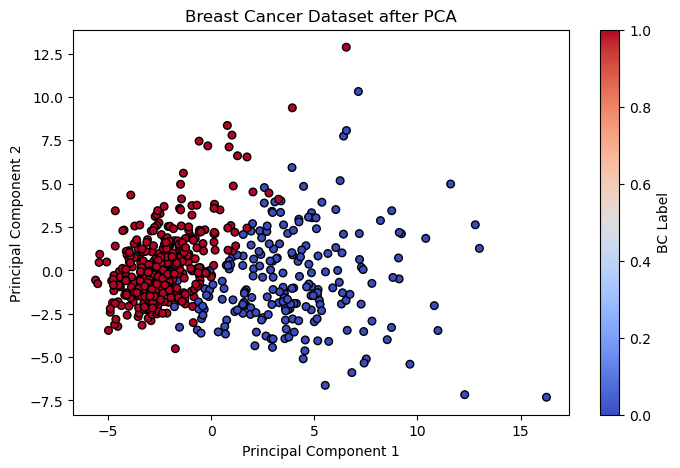

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(x[:,0],x[:,1],c=data['target'],cmap='coolwarm',edgecolor='k', s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Dataset after PCA')
plt.colorbar(label='BC Label')
plt.show()

 # Conclusion

By reducing the dimensionality of the dataset to just two principal components, we were able to visualize the high-dimensional data in a 2D space. In the scatter plot, each point represents a digit image projected onto a 2D space. Different colors represent different digit labels. Despite the reduction in dimensionality, the essential characteristics of the dataset seem to be preserved, allowing us to discern patterns and structures within the data.

The reduced-dimensional representation provided by PCA facilitates interpretation. We can now visualize and analyze the dataset more easily, gaining insights into its underlying structure and relationships between data points.

# QUESTION 3

In [9]:
#Data downloaded
#Loadind data using pandas
data_path="golub.csv"
g_data = pd.read_csv(data_path)

# QUESTION 4

In [10]:
#. Uploading the dataset into a matrix A.
gr_data = g_data.drop(columns=g_data.columns[1:6])
m_val=g_data.values

#Now since A is going be used for PCA we remove the cateogorical variable
#A= m_val[:, [0] + list(range(6, m_val.shape[1]))]
A = m_val
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,...,7125,7126,7127,7128,7129,7130,7131,7132,7133,7134
0,39,BM,F,DFCI,BM:f,allB,-1363.276427,-1058.585495,-541.469194,74.349803,...,-35.081447,1565.618803,-485.680714,-170.261227,-919.114293,1675.050053,389.769289,-526.449219,-268.963924,-779.643092
1,40,BM,F,DFCI,BM:f,allB,-796.285053,-1167.103365,7.538493,83.544731,...,-404.737767,622.498054,-1275.354673,214.828233,-750.220666,-441.589276,9.841713,-671.911209,-671.911209,-644.272577
2,42,BM,F,DFCI,BM:f,allB,-679.139168,-1069.832308,-690.301829,-112.075981,...,193.780934,162.525483,-692.534361,517.498108,-674.674103,1265.396405,-65.192805,-714.859684,3672.066149,-822.021231
3,47,BM,M,DFCI,BM:m,allB,-1164.400197,-1109.939891,-990.127218,-238.574994,...,-256.002292,-31.625831,-621.975549,-458.59463,-630.689198,937.767618,-264.715941,-635.046022,475.944222,-794.070116
4,48,BM,F,DFCI,BM:f,allB,-1299.653758,-1401.998536,-1077.543813,-437.34456,...,-509.20366,383.591216,-905.517483,-36.67564,-1116.739685,316.087213,-210.879518,-953.423549,-291.448812,-1057.945876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,29,BM,NaN,CALGB,BM:NA,aml,-589.611534,-877.740714,-618.647808,-192.037937,...,-236.709128,475.796364,-502.502712,-4.418936,-652.151201,0.048183,-509.203391,-609.71357,4925.046956,-627.582046
68,30,BM,NaN,CALGB,BM:NA,aml,-1552.764727,-1288.774596,-1085.544097,-232.814069,...,-415.09297,657.628835,-754.508853,102.411495,-817.363646,657.628835,-410.90265,-905.360357,-109.199643,-951.453872
69,31,BM,NaN,CALGB,BM:NA,aml,-772.071972,-809.591203,-593.303872,-193.834414,...,-621.995048,605.104501,-575.647763,-226.939618,-750.001836,596.276447,95.284364,-758.82989,-407.914731,-772.071972
70,32,BM,NaN,CALGB,BM:NA,aml,-1124.873709,-1026.849847,-935.360908,-135.921851,...,-96.712306,1188.489447,-887.438131,88.443879,-859.120126,1693.856917,-236.124022,-769.809496,-205.627709,-861.298435


# QUESTION 5


###### The number of Rows and Columns in Matrix A

In [11]:
print("There are {} rows and {} columns in the Matrix A".format(A.shape[0],A.shape[1]))

There are 72 rows and 7135 columns in the Matrix A


# QUESTION 6

In [12]:
#Covariance and its rank
A_ = gr_data.values
sigma = np.cov(A_.T)
pd.DataFrame(sigma)

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,438.000000,1506.215543,230.971890,778.051123,1429.487592,1835.205641,3154.285652,-662.859880,1372.861210,206.849199,...,571.934032,-2487.271364,273.731337,1391.287262,391.195364,-1785.066570,-593.927087,410.278270,1.763916e+03,1067.191376
1,1506.215543,77680.748964,42731.498786,40116.515508,25144.229532,48588.886074,59764.540853,28653.015093,42904.475867,22812.825100,...,17257.384032,-30263.785896,22893.666920,9762.904424,29257.463663,-58827.959556,-25455.707286,22074.638547,1.275924e+05,32018.159558
2,230.971890,42731.498786,67515.265132,38201.906462,11060.384353,51742.815488,54772.322108,36663.045434,40359.682848,14935.836944,...,14288.280266,-43076.264680,30453.983600,1236.522064,27786.360771,-39772.701616,-22623.499854,20708.766445,7.822804e+04,27687.490089
3,778.051123,40116.515508,38201.906462,107581.367623,21010.609863,50040.192794,49949.376921,35551.043556,31810.194554,23251.403764,...,12116.778833,-18532.728738,18214.695322,-15783.831544,16217.252593,-62451.946900,-19814.921122,14215.058794,5.784239e+04,27930.220521
4,1429.487592,25144.229532,11060.384353,21010.609863,59499.852238,16228.022152,26663.168875,-16867.065845,9160.011210,17662.811751,...,16829.510513,2496.898204,5406.829829,-16603.520730,11949.768079,28563.511872,14652.386317,9874.678110,1.068858e+05,15238.658068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,-1785.066570,-58827.959556,-39772.701616,-62451.946900,28563.511872,-140789.860056,-157791.377795,-7162.860992,-82391.328468,13534.942995,...,35144.508604,188456.763082,-27657.055609,21266.693869,3898.083128,858911.624194,198175.511916,11991.378087,4.640533e+05,-5391.174099
7126,-593.927087,-25455.707286,-22623.499854,-19814.921122,14652.386317,-57241.471233,-62282.979717,43352.383705,-19589.254495,37516.189695,...,10693.344304,143165.693178,5660.500383,-34144.126943,11544.477191,198175.511916,186980.554347,19271.052546,1.742398e+04,11833.256519
7127,410.278270,22074.638547,20708.766445,14215.058794,9874.678110,14724.502321,18196.668300,17464.073015,23579.718181,21739.238262,...,13577.451192,8882.027931,20831.612844,-3423.337167,23068.712425,11991.378087,19271.052546,23659.498389,4.538666e+04,22116.463164
7128,1763.916434,127592.400373,78228.038532,57842.386772,106885.832857,13009.636893,55913.554859,-70025.939751,587.464543,52446.672447,...,54912.486498,-121235.536177,60357.189983,3204.799661,73764.603863,464053.266128,17423.979182,45386.655343,1.868784e+06,47926.010963


In [13]:
rank = np.linalg.matrix_rank(sigma)
print("The rank of the sample covariance matrix is", rank)

The rank of the sample covariance matrix is 71


##### The rank of the sample covariance matrix is 71

# QUESTION 7

Determining the Principal components of the data

In [14]:
# Standardize the features
scaler = StandardScaler()
scaler.fit(pd.DataFrame(A_))
data_s = scaler.transform(pd.DataFrame(A_))

pri = PCA()
pri.fit(data_s)
Pca_A = pri.transform(data_s)

In [15]:
#New dimension of the data
print(Pca_A.shape)

(72, 72)


The principal componenets are shown below

In [16]:
pd.DataFrame(Pca_A)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-29.506142,14.055221,-10.746771,-8.848384,-18.466907,1.148238,-31.228208,-0.834315,13.562630,11.020967,...,-0.620435,1.660612,0.896930,-0.414857,-0.893185,3.196435,0.786184,0.750593,0.649541,5.093148e-15
1,-35.150351,23.580903,-21.863577,20.778067,24.249761,24.245086,11.904831,14.200765,-5.866577,11.142669,...,0.461405,-0.882608,-2.751497,-0.491531,-1.195171,1.423419,-0.686844,-0.362633,-1.873513,2.997602e-15
2,2.776516,-10.797173,8.213229,-17.759007,-28.956596,9.046170,21.544958,7.169164,0.246067,3.534330,...,-2.989318,-5.579712,0.209218,-1.037797,-5.369637,-0.746792,-2.090157,0.349540,1.277945,-1.033895e-15
3,-25.919476,-28.444322,-5.925666,7.739521,-8.837515,7.008917,0.244294,-3.634773,4.817061,-12.215910,...,6.004798,-6.083569,0.362708,0.740417,1.067265,-0.221032,0.034149,-0.322644,1.620541,-2.234324e-15
4,70.983552,-26.086392,-24.814104,7.887476,-4.626022,10.668268,-0.817090,9.017980,-4.689245,-3.739125,...,-3.010001,-9.954451,4.830285,-15.852989,-1.557270,-0.078456,-6.603773,1.789644,1.924108,3.108624e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-24.125475,-34.723115,25.110193,-5.800889,-0.364757,6.941712,18.878964,-3.648482,-0.303787,-2.965170,...,10.533639,1.965276,-1.170141,-10.014066,22.070251,9.911819,5.916309,-1.242678,-3.401082,-1.004752e-14
68,42.881771,8.173527,47.988773,17.247091,4.293273,-15.757365,14.383005,-1.955847,-16.364748,21.826343,...,-1.412394,-0.204822,-3.082599,-1.501521,0.674093,0.927896,0.377345,1.534798,0.221987,4.052314e-15
69,-1.833501,17.502259,14.677697,1.496301,21.051800,-10.839897,0.295050,9.671989,-4.672114,5.057181,...,0.757828,-3.006672,-1.976024,-3.573808,0.689870,-0.698916,-2.012372,0.735256,-2.026261,-4.718448e-15
70,27.680866,32.677480,16.251117,-3.726364,3.317152,-7.468609,-4.179990,7.590232,6.437332,12.480296,...,-1.740398,1.065455,0.281338,3.224643,0.111499,2.063292,1.439851,-0.680437,0.358046,-2.303713e-15


# QUESTION 8

In [19]:
eigenvalues, eigenvectors = np.linalg.eigh(sigma)

#I use the method eigh since we have symmetric matrix

##### The eigenvalues of the sample Covariance

In [18]:
pd.DataFrame(eigenvalues)

,0
0,-4.042967e-06
1,-2.123979e-06
2,-1.874957e-06
3,-1.740260e-06
4,-1.646900e-06
...,...
7125,1.444716e+09
7126,1.525597e+09
7127,2.029987e+09
7128,2.605070e+09
